# Model training for Ridge , Lasso and ElasticNet

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
from google.colab import files
uploaded = files.upload()

Saving Algerian_forest_fires_dataset_CLEANED.csv to Algerian_forest_fires_dataset_CLEANED (1).csv


In [31]:
df = pd.read_csv('Algerian_forest_fires_dataset_CLEANED.csv')

In [32]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [33]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,2


In [34]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [35]:
# Drop day, month and year as no use in Model training
df.drop(['day', 'month', 'year'], axis = 1, inplace= True)

In [36]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [37]:
df.Classes.value_counts()

,count
Classes,
fire,137
not fire,106


In [38]:
# Encoding for Classes

df['Classes'] = np.where(df['Classes'].str.contains("not fire"), 0, 1)

In [39]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,2
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,2
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,2
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,2
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,2


In [40]:
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


# Separate independent and dependent features

In [41]:
x = df.drop('FWI', axis = 1)
y = df['FWI']

In [42]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,1


In [43]:
y.head()

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5


# Train - test split

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [68]:
x_train.shape, x_test.shape

((182, 9), (61, 9))

# Feature Selection

<Axes: >

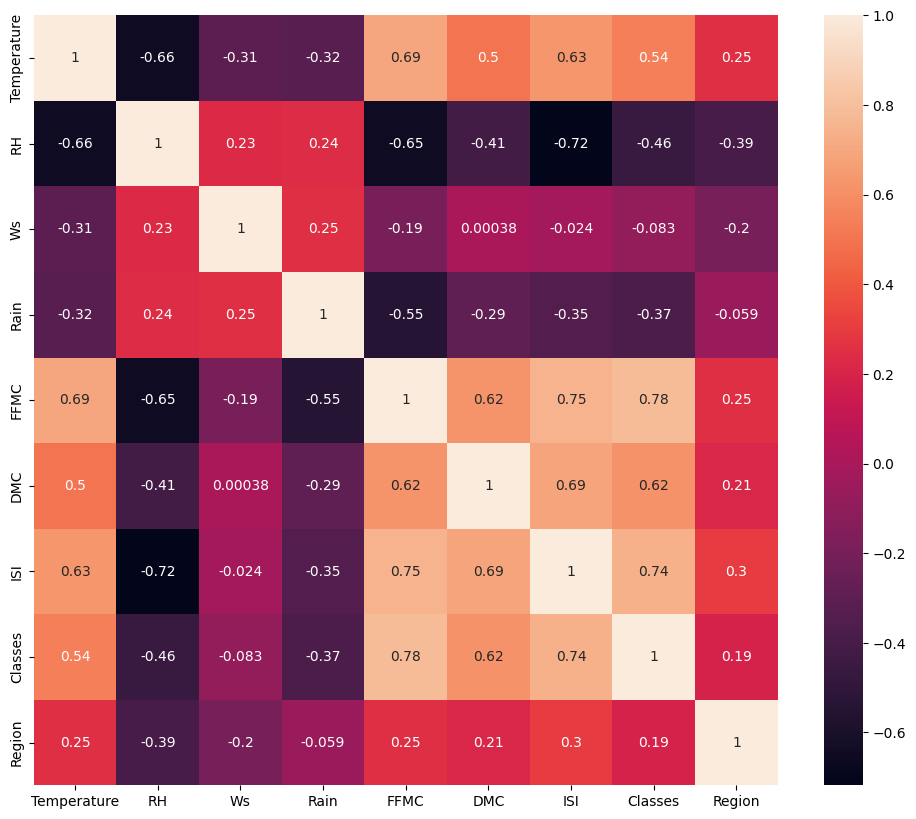

In [67]:
# Check Correlation matrix

# check for multicollinearity (when 2 independent variables are highly correlated with each other)
# If there are 2 independent features that are highly correlated to each other, we can drop any one feature and use other feature only.
# This method is known as Feature selection

plt.figure(figsize = (12,10))
sns.heatmap(x_train.corr(), annot = True)

In [50]:
# Now we will collect all the columns where Multicollinearity is present.

def correlation(df, threshold):
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
      for j in range(i):
        if abs(corr_matrix.iloc[i,j]) > threshold:
          colname = corr_matrix.columns[i]
          col_corr.add(colname)

    return col_corr

In [51]:
# threshold is provided by domain level expertise

corr_features = correlation(x_train, 0.85)

In [52]:
corr_features

{'BUI', 'DC'}

In [53]:
x_train.shape, x_test.shape

((182, 11), (61, 11))

In [54]:
# Droping features when correlation  is more than 0.85 (multicollinear features)

x_train.drop(corr_features, axis = 1, inplace = True)
x_test.drop(corr_features, axis = 1, inplace = True)

In [55]:
x_train.shape, x_test.shape

((182, 9), (61, 9))

# Feature scaling and Standardization

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [57]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [58]:
x_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

# Boxplot ot understand the effect of StandardScaler

Text(0.5, 1.0, 'x_train after scaling')

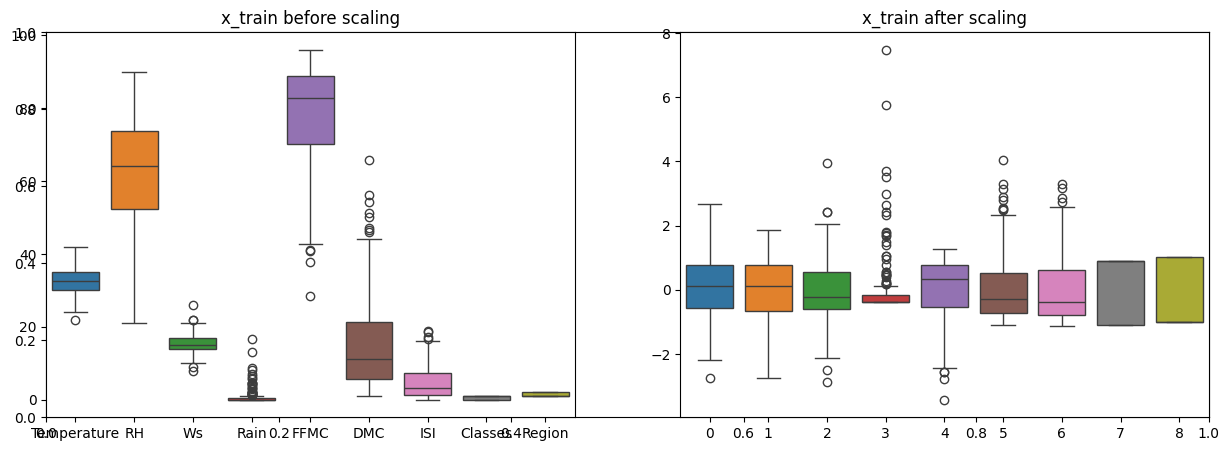

In [59]:
plt.subplots(figsize = (15, 5))

plt.subplot(1,2,1)
sns.boxplot(data = x_train)
plt.title("x_train before scaling")

plt.subplot(1,2,2)
sns.boxplot(data = x_train_scaled)
plt.title("x_train after scaling")

NOTE: The scaled data(second fig) looks more organised and can be analysed nicely.

# Using different models :

# 1. Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

regression = LinearRegression()
regression.fit(x_train_scaled, y_train)
y_pred = regression.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)     # we find mae bcz outliers are present in this dataset
r2 = r2_score(y_test, y_pred)

print("MAE: ", mae)
print("r2 score", r2)

MAE:  0.9939450225331374
r2 score 0.9607056657860652


# 2. Lasso Regression

In [64]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(x_train_scaled, y_train)
y_pred = lasso.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE: ", mae)
print("r2 score", r2)

MAE:  0.9605020166901078
r2 score 0.9692970913627958


# 3. Ridge Regression

In [62]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(x_train_scaled, y_train)
y_pred= ridge.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE: ", mae)
print("r2 score", r2)

MAE:  0.9862070802884405
r2 score 0.9616458508455313


# 4. ElasticNet Regression

In [63]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()
elastic.fit(x_train_scaled, y_train)
y_pred = elastic.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE: ", mae)
print("r2 score", r2)

MAE:  1.6511868133560943
r2 score 0.9081701979826985


# Pickling

In [65]:
# Here I am pickling Ridge model as Sir suggested.
# I am getting better result in Lasso actually, but ok let's see.

In [66]:
import pickle
pickle.dump( scaler, open('scaler.pkl','wb') )
pickle.dump( ridge, open('ridge.pkl', 'wb') )